In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cma
from es import *
from electrolyser import Electrolyser
from network_arch import Agent
from simulation import get_agent_working_result, estimate_results

In [2]:
import copy

In [3]:
agent = Agent()

In [4]:

def apply_solution(solution):

    agent.updateParams(solution)

    [total_Production_in_dinamics,
     desired_total_Production_in_dinamics,
     Production_Error_in_dinamics,

     total_cost_of_work_for_elecs,
     total_run_out_for_elecs,

     Outs,
     Temperatures,
     States,
     Targets,
     switch_nums_for_elecs,
     Control_signals,

     Output_derivative_for_elecs,
     Output_dderivative_for_elecs]                                       = get_agent_working_result(agent)

    return [Production_Error_in_dinamics, total_run_out_for_elecs, switch_nums_for_elecs,
            total_Production_in_dinamics, desired_total_Production_in_dinamics]


In [5]:
param_count = 0
for param in agent.model.parameters():
  print(param.data.shape)
  param_count += np.product(param.data.shape)
print(param_count)

torch.Size([50, 99])
torch.Size([50])
torch.Size([50, 50])
torch.Size([50])
torch.Size([10, 50])
torch.Size([10])
8060


In [6]:
solution = np.random.rand(8060,1) * 6 - 3 # случайное решение можно оценить до начала обучения

In [7]:
import pickle

In [9]:

file_model = open('serialised_data_CMAES_MarkovDelta_t/best_model_relu_linear_norm_2out.pkl', 'rb')
file_params = open('serialised_data_CMAES_MarkovDelta_t/best_params_relu_linear_norm_2out.pkl', 'rb')
#file_es = open('serialised_data_CMAES_MarkovDelta_t/evalution_strategy_relu_linear_norm_2out.pkl', 'rb')
file_log = open('serialised_data_CMAES_MarkovDelta_t/logs_relu_linear_norm_2out.pkl', 'rb')
file_dict_score_solution = open('serialised_data_CMAES_MarkovDelta_t/score_solution_relu_linear_norm_2out__number3.pkl', 'rb')

best_model = pickle.load(file_model)
best_params = pickle.load(file_params)
#old_es = pickle.load(file_es)
data_log = pickle.load(file_log)
dict_score_solution_old_3100 = pickle.load(file_dict_score_solution)

file_model.close()
file_params.close()
#file_es.close()
file_log.close()
file_dict_score_solution.close()


EOFError: Ran out of input

In [9]:
data_log1 = data_log.copy()

agent.updateParams(best_params)


NameError: name 'data_log' is not defined

In [10]:
es = old_es

NameError: name 'old_es' is not defined

In [11]:
dict_score_solution = []

In [13]:
# PEPG, CMA ES, SimpleGA search

# sigma_init = 0.5 # 0.1
#
# popsize = 100
#
# es = CMAES(num_params=param_count, sigma_init = sigma_init, popsize=popsize)
# es.es.x0 = copy.deepcopy(best_params)

# data_log1 = []
#
# dict_score_solution = []



(50_w,100)-aCMA-ES (mu_w=27.0,w_1=8%) in dimension 8060 (seed=892138, Sun Mar 20 13:11:47 2022)


In [14]:
data_log2 = []

In [15]:

def train_for_some_generations(generations_num):

    for i in range(generations_num):

        solutions = es.ask()

        reward_list = []

        solut_number = 0
        for solution in solutions: # можно параллельно

            [Production_Error_in_dinamics, total_run_out_for_elecs, switch_nums_for_elecs,
            total_Production_in_dinamics, desired_total_Production_in_dinamics] = apply_solution(solution)
            score = estimate_results([Production_Error_in_dinamics, total_run_out_for_elecs])[0] # get cost functions value at point solution

            reward_list.append(score)

            print(str(solut_number) + ' solution is aplied, score = ' + str(score) + '  min-max = ' + str(min(solution)) + ' -- ' + str(max(solution)))

            dict_score_solution.append([score, solution])

            solut_number += 1

        es.tell(reward_list)

        es_solution = es.result()

#         model_params = es_solution[0] # best historical solution

        best_reward = es_solution[1] # best reward
        curr_best_reward = es_solution[2] # best of the current batch

        curr_best_reward_my_for_validation = max(reward_list) # min with '-'

        print(str(i) + "  ==>>", end=' ')
        print(curr_best_reward_my_for_validation, end=' === ')
        print(curr_best_reward, end=' === ')
        print(best_reward, end=' === ')
        print(es.rms_stdev())


        data_log1.append(curr_best_reward_my_for_validation)
        data_log2.append(curr_best_reward)
        # data_log3.append(curr_reward)

        # if abs(13-my_reward) <= 0.01 or abs(13-reward) <= 0.01 or i >= 1000: # todo
        #     break


    return [es.result(), es.current_param()] # best historical solution

# PEPG search

# максимизируем функцию estimate_sulution(solution)

# 3000h in steady equal to 500h in cycling as a ratio and the cycle length could be 2h On 4h Off




In [26]:
%%time

train_Report = train_for_some_generations(3)


0 solution is aplied, score = -446.3301450869172  min-max = -1.766607902916908 -- 1.6409584306110663
1 solution is aplied, score = -91.44610222443842  min-max = -2.0897872215395217 -- 1.94769158864234
2 solution is aplied, score = -62.142535723634694  min-max = -1.714599694105693 -- 1.9845076077425368
3 solution is aplied, score = -487.4638559578998  min-max = -1.7197288536302624 -- 1.7473254787885777
4 solution is aplied, score = -304.77217217759846  min-max = -1.9378869636620213 -- 1.7956424021782456
5 solution is aplied, score = -337.9689297831461  min-max = -1.749317655797537 -- 1.9683865328904213
6 solution is aplied, score = -464.77515027793044  min-max = -2.05552306392409 -- 2.0513980895122796
7 solution is aplied, score = -82.2570765724023  min-max = -1.9252604744127622 -- 1.9073188700997248
8 solution is aplied, score = -376.4264148296365  min-max = -1.9783579976012309 -- 1.8870741320752762
9 solution is aplied, score = -660.438687841232  min-max = -1.8306912100270414 -- 1.923

In [27]:
curr_solution = train_Report[1]

In [28]:
best_solution = train_Report[0][0]

In [29]:
#print(len(dict_score_solution))
print(len(data_log1))

263


In [30]:
%%time

[Production_Error_in_dinamics, total_run_out_for_elecs, switch_nums_for_elecs,
            total_Production_in_dinamics, desired_total_Production_in_dinamics] = apply_solution(best_solution) #

[neg_J, RMSE, mean_error, asymetric_error, max_total_run_out, run_out_deviation_RMSE] = estimate_results([Production_Error_in_dinamics, total_run_out_for_elecs])

print('=========================== SCORE')
print('neg_J = ' + str(neg_J))
print('RMSE = ' + str(RMSE))
print('mean_error = ' + str(mean_error))
print('asymetric_error = ' + str(asymetric_error))
print('max_total_run_out = ' + str(max_total_run_out))
#print(min_max_tot_run_out)
print('run_out_deviation_RMSE = ' + str(run_out_deviation_RMSE))
print("switc num = ", end=' ')
print(switch_nums_for_elecs)
print(sum(switch_nums_for_elecs))

# random

# best -35
# neg_J = -49.48215462662633
# RMSE = 159.28549823669758
# mean_error = -15.776771911330563
# asymetric_error = 3.2574091075081335
# max_total_run_out = 39301.89999999208
# run_out_deviation_RMSE = 12949.266705779768
# switc num =  [7 1 1 5 2]
# 16

# curr
# neg_J = -58.77654455635961
# RMSE = 191.74497797489178
# mean_error = -22.351980738696692
# asymetric_error = 5.502065819459573
# max_total_run_out = 7631.900000007858
# run_out_deviation_RMSE = 0.0
# switc num =  [1 1 1 1 1]
# 5



=========================== SCORE
neg_J = -61.07859959419801
RMSE = 187.0759181658916
mean_error = -42.355084052975876
asymetric_error = 18.062281456168087
max_total_run_out = 50081.79999999307
run_out_deviation_RMSE = 17086.59265985227
switc num =  [1 9 1 5 1]
17
CPU times: user 3.29 s, sys: 8.09 ms, total: 3.3 s
Wall time: 3.27 s


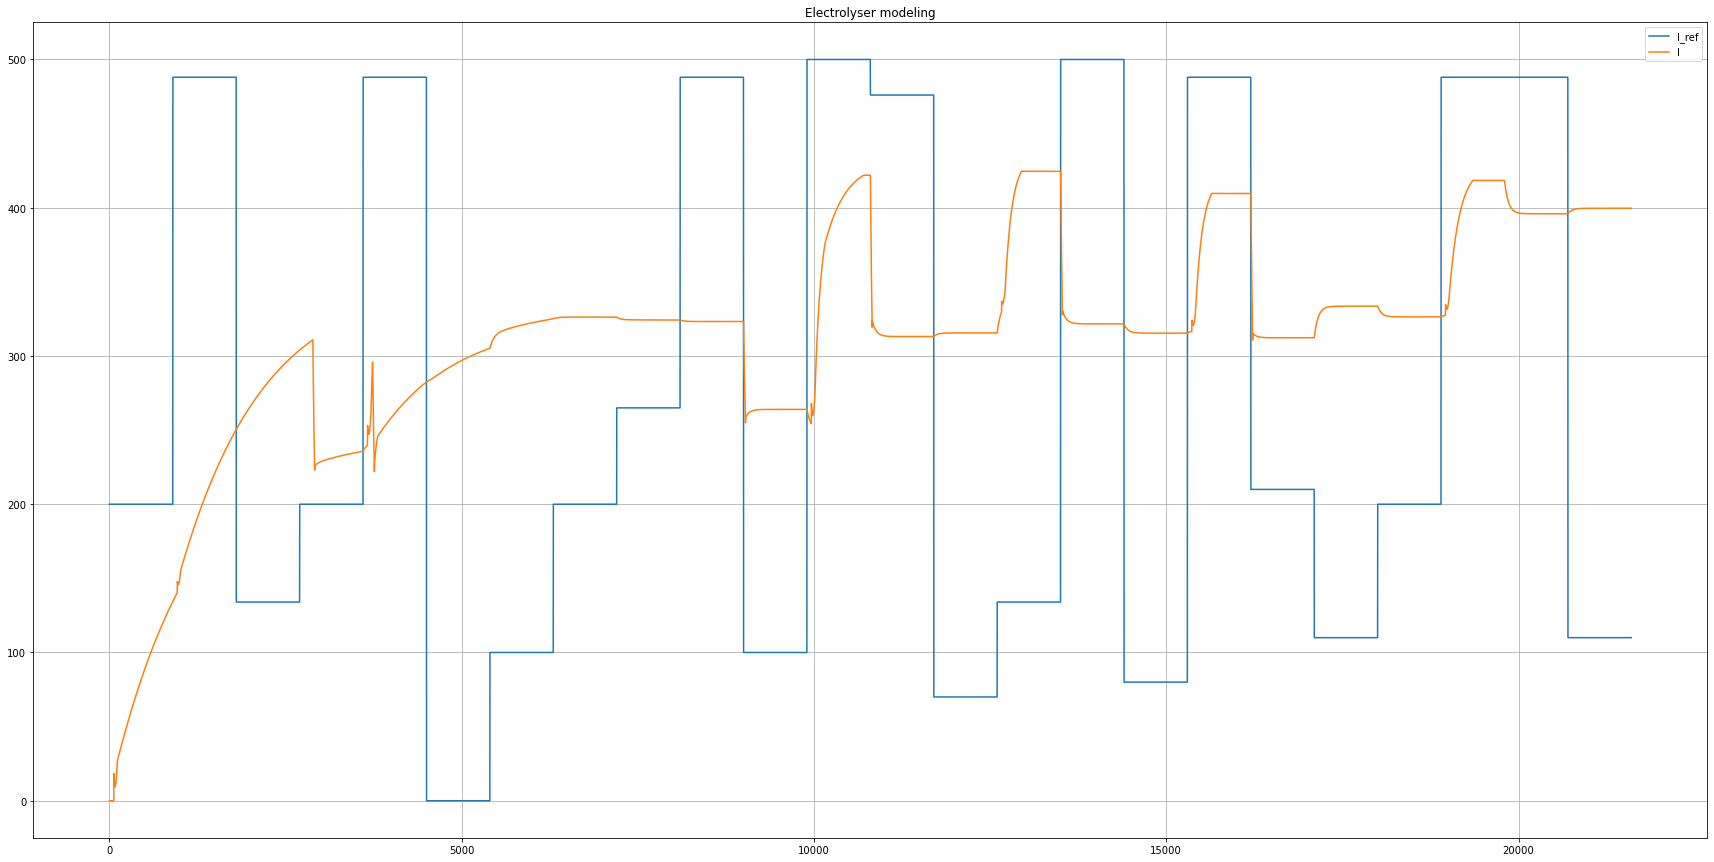

In [31]:
plt.figure(figsize=(30, 15))
plt.title("Electrolyser modeling")
plt.plot(desired_total_Production_in_dinamics, label='I_ref')
plt.plot(total_Production_in_dinamics, label='I')

plt.legend()
plt.grid(visible=True)

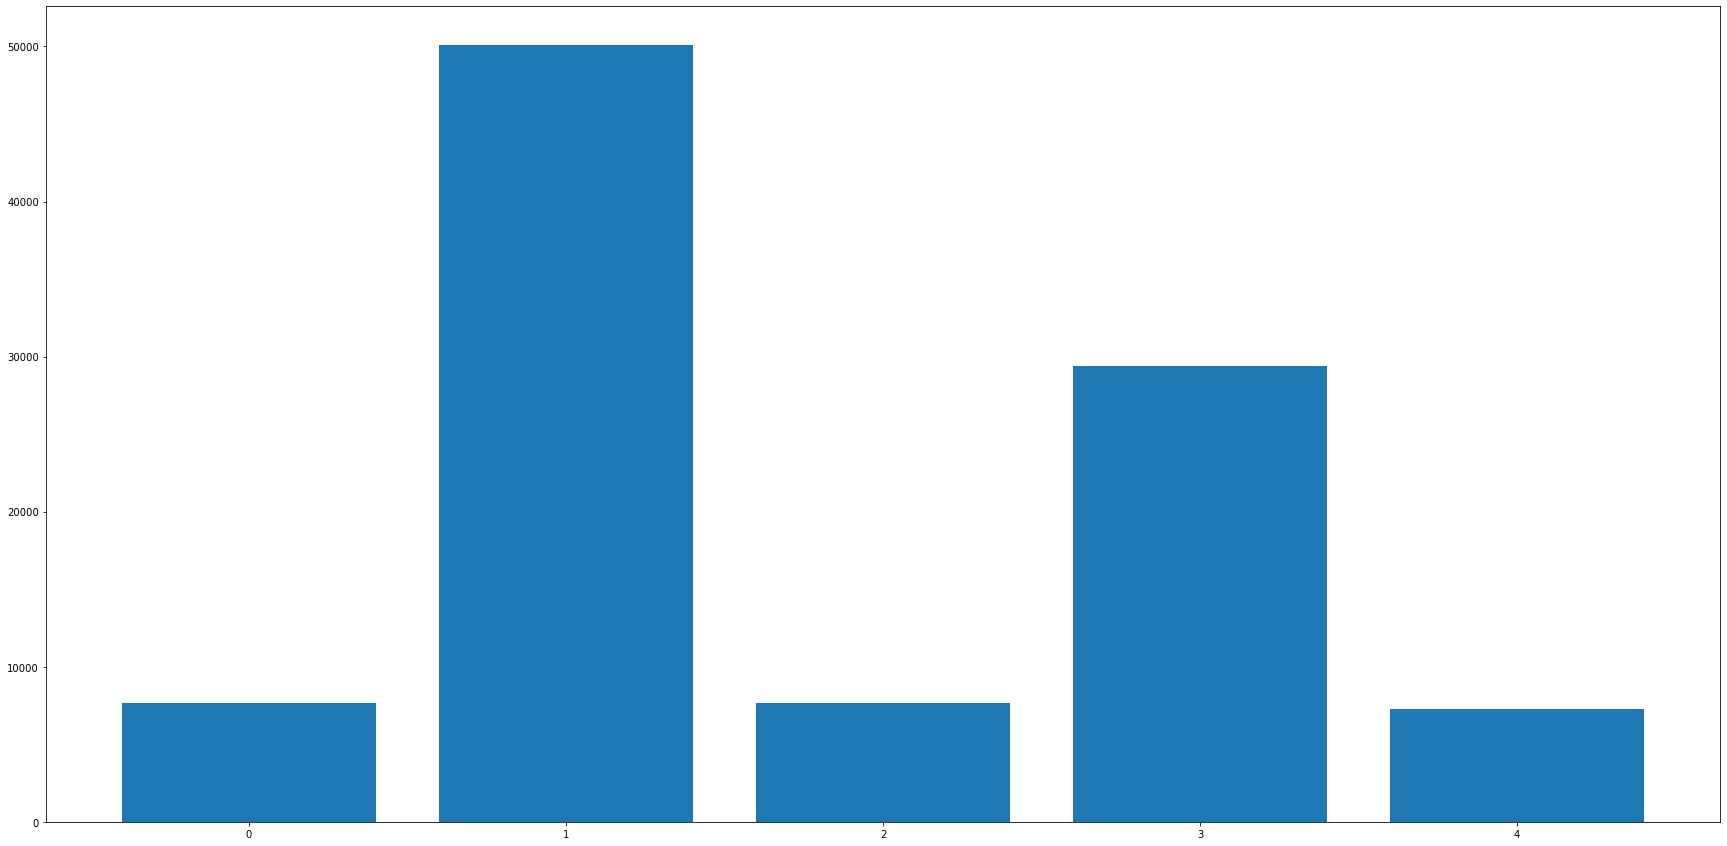

In [32]:
num_elecs = 5
names = list(range(num_elecs))
values = total_run_out_for_elecs

plt.figure(figsize=(30, 15))
plt.bar(names, values)
plt.show()

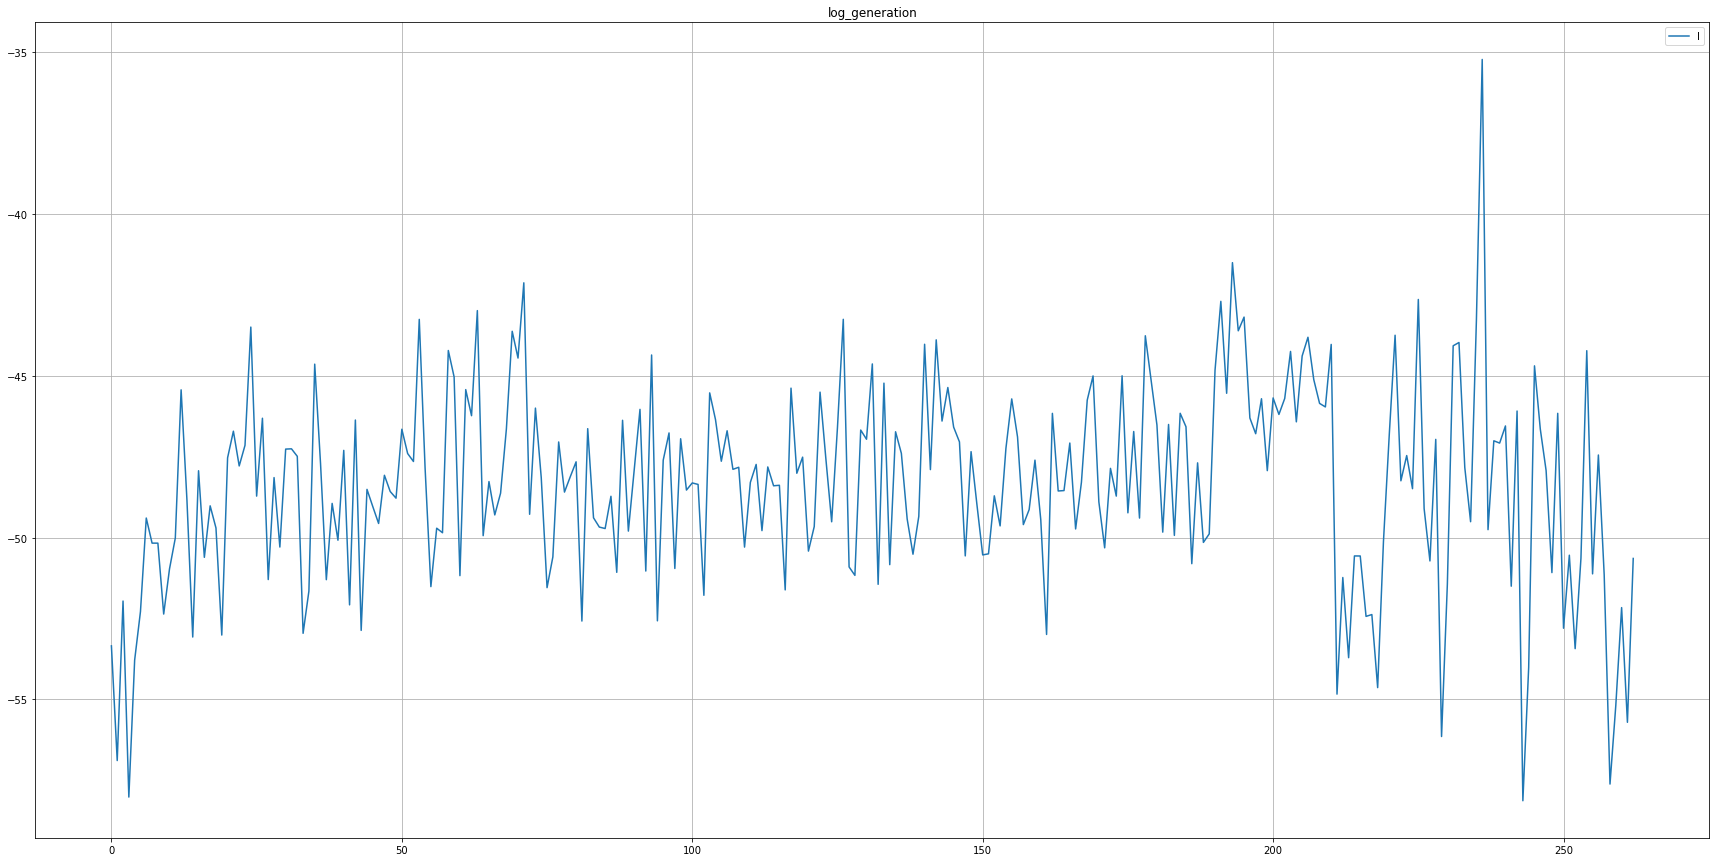

In [33]:
plt.figure(figsize=(30, 15))
plt.title("log_generation")
plt.plot(data_log1, label='I')

plt.legend()
plt.grid(visible=True)

In [34]:
import pickle

In [ ]:

file_model = open('serialised_data_CMAES_MarkovDelta_t/best_model_relu_linear_norm_2out.pkl', 'wb')
file_params = open('serialised_data_CMAES_MarkovDelta_t/best_params_relu_linear_norm_2out.pkl', 'wb')
file_es = open('serialised_data_CMAES_MarkovDelta_t/evalution_strategy_relu_linear_norm_2out.pkl', 'wb')
file_log = open('serialised_data_CMAES_MarkovDelta_t/logs_relu_linear_norm_2out.pkl', 'wb')
file_dict_score_solution = open('serialised_data_CMAES_MarkovDelta_t/score_solution_relu_linear_norm_2out__number3.pkl', 'wb')

pickle.dump(agent.model, file_model)
pickle.dump(best_solution,file_params)
pickle.dump(es, file_es)
pickle.dump(data_log1, file_log)
pickle.dump(dict_score_solution, file_dict_score_solution)

file_model.close()
file_params.close()
file_es.close()
file_log.close()
file_dict_score_solution.close()


In [2]:
66485 * 0.00009

5.983650000000001